In [1]:
from util.VisualizeDataset import VisualizeDataset
from Chapter5.DistanceMetrics import InstanceDistanceMetrics
from Chapter5.DistanceMetrics import PersonDistanceMetricsNoOrdering
from Chapter5.DistanceMetrics import PersonDistanceMetricsOrdering
from Chapter5.Clustering import NonHierarchicalClustering
from Chapter5.Clustering import HierarchicalClustering
import copy
import pandas as pd
import matplotlib.pyplot as plot
import util.util as util

In [ ]:
# Of course we repeat some stuff from Chapter 3, namely to load the dataset

DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = './intermediate_datafiles/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter4_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e
dataset.index = dataset.index.to_datetime()

# First let us use non hierarchical clustering.

clusteringNH = NonHierarchicalClustering()

# Let us look at k-means first.

k_values = range(2, 10)
silhouette_values = []
#
## Do some initial runs to determine the right number for k
#
print '===== kmeans clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.ylim([0,1])
plot.show()

# And run the knn with the highest silhouette score

k = 6

dataset_knn = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 50, 50)
DataViz.plot_clusters_3d(dataset_knn, ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_knn, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_knn, 'cluster', ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'label')
del dataset_knn['silhouette']


k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for k

print '===== k medoids clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.show()

# And run k medoids with the highest silhouette score

k = 6

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'label')

# And the hierarchical clustering is the last one we try

clusteringH = HierarchicalClustering()

k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for the maximum number of clusters.

print '===== agglomaritive clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster, l = clusteringH.agglomerative_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'euclidean', use_prev_linkage=True, link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)
    if k == k_values[0]:
        DataViz.plot_dendrogram(dataset_cluster, l)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('max number of clusters')
plot.ylabel('silhouette score')
plot.show()

# And we select the outcome dataset of the knn clustering....

dataset_knn.to_csv(dataset_path + 'chapter5_result.csv')


In [ ]:
# Of course we repeat some stuff from Chapter 3, namely to load the dataset

DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = './intermediate_datafiles/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter4_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e
dataset.index = dataset.index.to_datetime()

# First let us use non hierarchical clustering.

clusteringNH = NonHierarchicalClustering()

# Let us look at k-means first.

k_values = range(2, 10)
silhouette_values = []
#
## Do some initial runs to determine the right number for k
#
print '===== kmeans clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.ylim([0,1])
plot.show()

# And run the knn with the highest silhouette score

k = 6

dataset_knn = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 50, 50)
DataViz.plot_clusters_3d(dataset_knn, ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_knn, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_knn, 'cluster', ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'label')
del dataset_knn['silhouette']


k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for k

print '===== k medoids clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.show()

# And run k medoids with the highest silhouette score

k = 6

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'label')

# And the hierarchical clustering is the last one we try

clusteringH = HierarchicalClustering()

k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for the maximum number of clusters.

print '===== agglomaritive clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster, l = clusteringH.agglomerative_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'euclidean', use_prev_linkage=True, link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)
    if k == k_values[0]:
        DataViz.plot_dendrogram(dataset_cluster, l)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('max number of clusters')
plot.ylabel('silhouette score')
plot.show()

# And we select the outcome dataset of the knn clustering....

dataset_knn.to_csv(dataset_path + 'chapter5_result.csv')


# our Data

In [5]:
# Of course we repeat some stuff from Chapter 3, namely to load the dataset

DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = './intermediate_datafiles/ourdata/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter3_result_final.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e
dataset.index = dataset.index.to_datetime()


C:\Users\zdujmic\AppData\Local\Continuum\Anaconda2\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  del sys.path[0]


In [6]:
dataset.isnull().sum()

acc_phone_x           0
acc_phone_y           0
acc_phone_z           0
gyr_phone_x           0
gyr_phone_y           0
gyr_phone_z           0
step_counter_steps    0
labelOnTable          0
labelWalking          0
labelRunning          0
light_phone_lux       0
mag_phone_x           0
mag_phone_y           0
mag_phone_z           0
dtype: int64

===== kmeans clustering =====
k =  2
silhouette =  0.499561890858
k =  3
silhouette =  0.538052483079
k =  4
silhouette =  0.552090868614
k =  5
silhouette =  0.551565264969
k =  6
silhouette =  0.552520168407
k =  7
silhouette =  0.542683315516
k =  8
silhouette =  0.55250417018
k =  9
silhouette =  0.53429073943


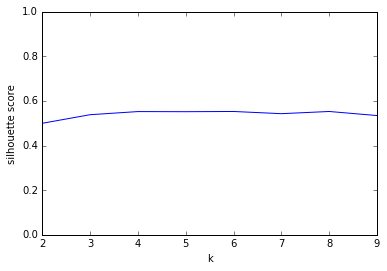

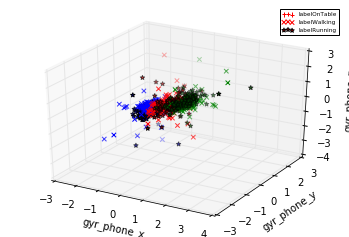

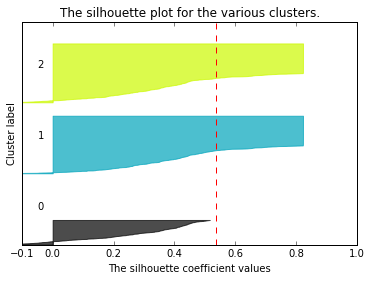

\multirow{2}{*}{ gyr_phone_x } & mean   &  -0.00  &  0.85  &  -0.86 \\
 & std   &  0.19  &  0.38  &  0.29 \\
\multirow{2}{*}{ gyr_phone_y } & mean   &  0.02  &  0.10  &  -0.10 \\
 & std   &  0.31  &  0.51  &  0.44 \\
\multirow{2}{*}{ gyr_phone_z } & mean   &  0.00  &  0.42  &  -0.47 \\
 & std   &  0.18  &  0.37  &  0.44 \\
labelOnTable  & percentage   &  100.00 \%  &  0.00 \%  &  0.00 \% \\
labelWalking  & percentage   &  49.46 \%  &  25.38 \%  &  25.16 \% \\
labelRunning  & percentage   &  39.94 \%  &  33.43 \%  &  26.63 \% \\
===== k medoids clustering =====
k =  2
silhouette =  0.507872547814
k =  3
silhouette =  0.530385396562
k =  4
silhouette =  0.539760612075
k =  5
silhouette =  0.529024225234
k =  6
silhouette =  0.498814522713
k =  7
silhouette =  0.505717410287
k =  8
silhouette =  0.50562380892
k =  9
silhouette =  0.0862679211953


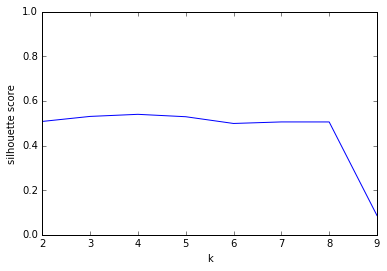

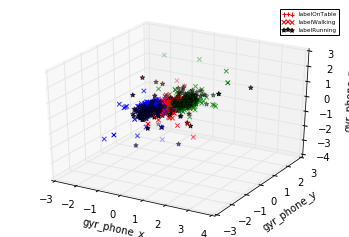

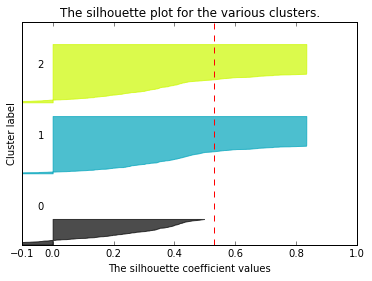

\multirow{2}{*}{ gyr_phone_x } & mean   &  0.01  &  0.80  &  -0.82 \\
 & std   &  0.19  &  0.44  &  0.32 \\
\multirow{2}{*}{ gyr_phone_y } & mean   &  0.00  &  0.16  &  -0.11 \\
 & std   &  0.28  &  0.53  &  0.45 \\
\multirow{2}{*}{ gyr_phone_z } & mean   &  -0.00  &  0.44  &  -0.46 \\
 & std   &  0.16  &  0.36  &  0.43 \\
labelOnTable  & percentage   &  100.00 \%  &  0.00 \%  &  0.00 \% \\
labelWalking  & percentage   &  46.64 \%  &  27.33 \%  &  26.03 \% \\
labelRunning  & percentage   &  38.46 \%  &  32.54 \%  &  28.99 \% \\
===== agglomaritive clustering =====
k =  2
silhouette =  0.504799004136


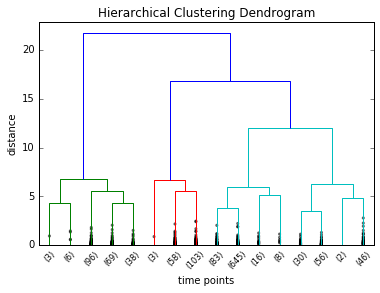

k =  3
silhouette =  0.507281412342
k =  4
silhouette =  0.534816651171
k =  5
silhouette =  0.541068343484
k =  6
silhouette =  0.544046788364
k =  7
silhouette =  0.529829360053
k =  8
silhouette =  0.54609842397
k =  9
silhouette =  0.526519772089


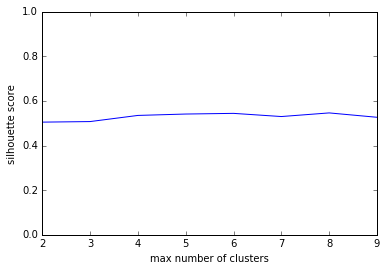

In [10]:

# First let us use non hierarchical clustering.

clusteringNH = NonHierarchicalClustering()

# Let us look at k-means first.

k_values = range(2, 10)
silhouette_values = []
#
## Do some initial runs to determine the right number for k
#
print '===== kmeans clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.ylim([0,1])
plot.show()

# And run the knn with the highest silhouette score

k = 3

dataset_knn = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 50, 50)
DataViz.plot_clusters_3d(dataset_knn, ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_knn, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_knn, 'cluster', ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'label')
del dataset_knn['silhouette']


k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for k

print '===== k medoids clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.show()

# And run k medoids with the highest silhouette score

k = 3

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'label')

# And the hierarchical clustering is the last one we try

clusteringH = HierarchicalClustering()

k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for the maximum number of clusters.

print '===== agglomaritive clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster, l = clusteringH.agglomerative_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'euclidean', use_prev_linkage=True, link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)
    if k == k_values[0]:
        DataViz.plot_dendrogram(dataset_cluster, l)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('max number of clusters')
plot.ylabel('silhouette score')
plot.show()

# And we select the outcome dataset of the knn clustering....

dataset_knn.to_csv(dataset_path + 'chapter5_result.csv')


===== kmeans clustering =====
k =  2
silhouette =  0.815683476857
k =  3
silhouette =  0.799733443661
k =  4
silhouette =  0.758273090242
k =  5
silhouette =  0.6001178914
k =  6
silhouette =  0.600556562202
k =  7
silhouette =  0.60928488773
k =  8
silhouette =  0.603327283658
k =  9
silhouette =  0.598718455714


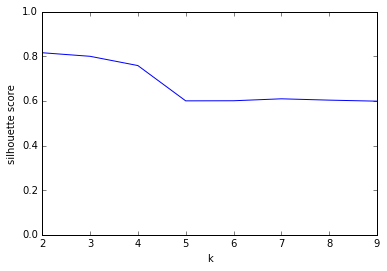

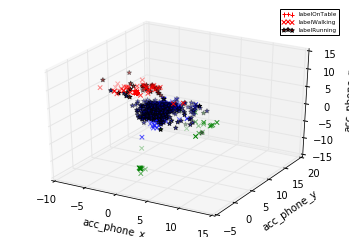

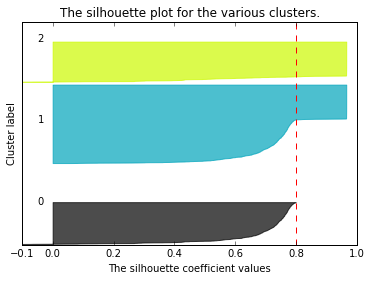

\multirow{2}{*}{ acc_phone_x } & mean   &  -0.03  &  4.56  &  -1.83 \\
 & std   &  0.87  &  2.93  &  1.57 \\
\multirow{2}{*}{ acc_phone_y } & mean   &  0.62  &  2.52  &  9.67 \\
 & std   &  1.24  &  4.17  &  1.87 \\
\multirow{2}{*}{ acc_phone_z } & mean   &  9.68  &  -4.08  &  -1.59 \\
 & std   &  0.59  &  5.06  &  1.22 \\
labelOnTable  & percentage   &  100.00 \%  &  0.00 \%  &  0.00 \% \\
labelWalking  & percentage   &  23.43 \%  &  5.86 \%  &  70.72 \% \\
labelRunning  & percentage   &  8.88 \%  &  1.18 \%  &  89.94 \% \\
===== k medoids clustering =====
k =  2
silhouette =  0.795180175825
k =  3
silhouette =  0.551375959007
k =  4
silhouette =  0.493084494537
k =  5
silhouette =  0.515857633559
k =  6
silhouette =  0.496070915448
k =  7
silhouette =  0.143385130618
k =  8
silhouette =  0.438030807088
k =  9
silhouette =  0.472383535738


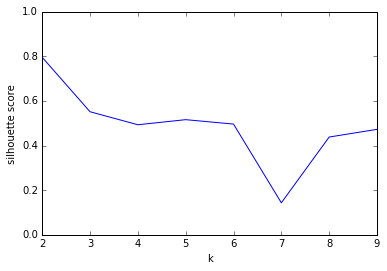

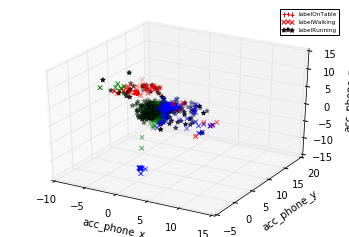

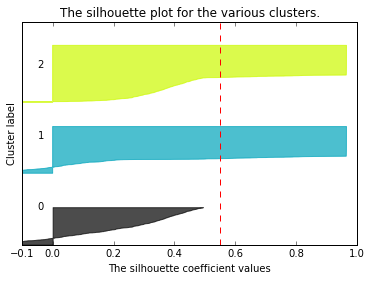

\multirow{2}{*}{ acc_phone_x } & mean   &  0.13  &  -2.69  &  0.14 \\
 & std   &  0.94  &  1.14  &  1.88 \\
\multirow{2}{*}{ acc_phone_y } & mean   &  0.57  &  9.31  &  9.32 \\
 & std   &  1.17  &  1.93  &  3.32 \\
\multirow{2}{*}{ acc_phone_z } & mean   &  9.64  &  -1.62  &  -1.52 \\
 & std   &  0.91  &  1.87  &  2.29 \\
labelOnTable  & percentage   &  100.00 \%  &  0.00 \%  &  0.00 \% \\
labelWalking  & percentage   &  22.99 \%  &  45.12 \%  &  31.89 \% \\
labelRunning  & percentage   &  7.99 \%  &  63.91 \%  &  28.11 \% \\
===== agglomaritive clustering =====
k =  2
silhouette =  0.813613364785


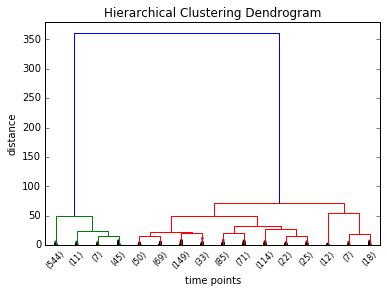

k =  3
silhouette =  0.781056405882
k =  4
silhouette =  0.755631369159
k =  5
silhouette =  0.754689534463
k =  6
silhouette =  0.578372878885
k =  7
silhouette =  0.572944538405
k =  8
silhouette =  0.568520437137
k =  9
silhouette =  0.57276318025


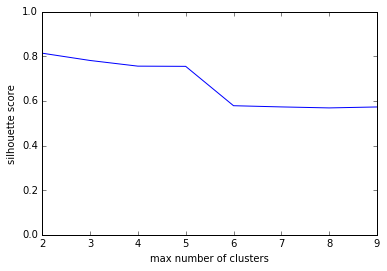

In [9]:

# First let us use non hierarchical clustering.

clusteringNH = NonHierarchicalClustering()

# Let us look at k-means first.

k_values = range(2, 10)
silhouette_values = []
#
## Do some initial runs to determine the right number for k
#
print '===== kmeans clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.ylim([0,1])
plot.show()

# And run the knn with the highest silhouette score

k = 3

dataset_knn = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 50, 50)
DataViz.plot_clusters_3d(dataset_knn, ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_knn, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_knn, 'cluster', ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'label')
del dataset_knn['silhouette']


k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for k

print '===== k medoids clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.show()

# And run k medoids with the highest silhouette score

k = 3

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'label')

# And the hierarchical clustering is the last one we try

clusteringH = HierarchicalClustering()

k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for the maximum number of clusters.

print '===== agglomaritive clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster, l = clusteringH.agglomerative_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'euclidean', use_prev_linkage=True, link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)
    if k == k_values[0]:
        DataViz.plot_dendrogram(dataset_cluster, l)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('max number of clusters')
plot.ylabel('silhouette score')
plot.show()

# And we select the outcome dataset of the knn clustering....

dataset_knn.to_csv(dataset_path + 'chapter5_result.csv')
